### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

### read and clean data

In [2]:
leads= pd.read_csv(r'C:\\Users\\dwive\\Downloads\\Lead+Scoring+Case+Study\\Lead Scoring Assignment\\Leads.csv')

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Inspect The Data
leads.shape

(9240, 37)

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [8]:
leads.nunique().shape

(37,)

In [9]:
#No Duplicate Values Found

In [10]:
#Dropping unique valued columns

In [11]:
leads.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'], 1, inplace = True)

In [12]:
# Prospect ID and Lead Number can be dropped. As they represent ID for connected
leads.drop(['Prospect ID','Lead Number'], 1, inplace = True)

In [13]:
#checking null values 
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [14]:
#checking percentage of null values 

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [15]:
# Removing all the columns that are no required and have 35% null values
leads = leads.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City'],axis=1)
leads.head()


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [16]:
# Rechecking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [17]:
#There are many columns with null so instead of dropping them we will replace 

In [18]:
leads['Specialization'] = leads['Specialization'].fillna('not specified') 
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].fillna('not specified')
leads['Country'] = leads['Country'].fillna('not specified')
leads['What is your current occupation'] = leads['What is your current occupation'].fillna('not specified')


In [19]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [20]:
#Categorical Attributes Analysis:

In [21]:
leads['Country'].value_counts(dropna=False)

India                   6492
not specified           2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

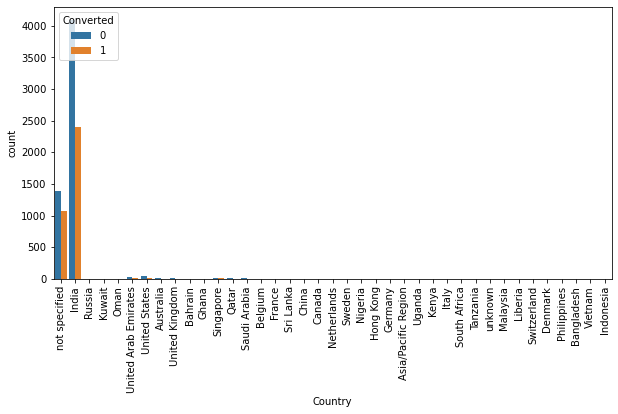

In [22]:
#plotting spread of Country columnn 
plt.figure(figsize=(10,5))
s1=sns.countplot(leads.Country, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [23]:
#India is the most occuring country so we can replace missing value with india

In [24]:
leads['Country'] = leads['Country'].replace(np.nan,'India')

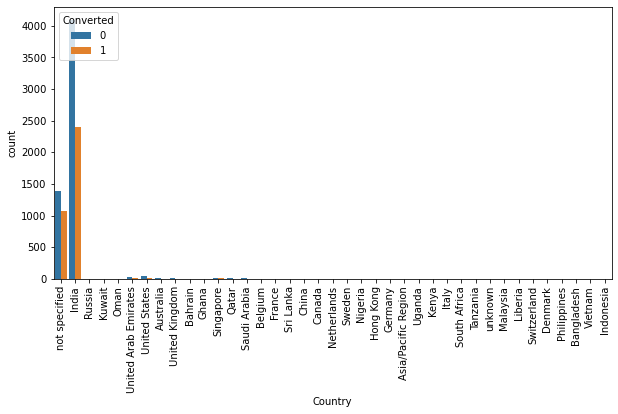

In [25]:
#Plot after replacing :Country

plt.figure(figsize=(10,5))
s1=sns.countplot(leads.Country, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [26]:
#Number of Values for India are quite high ,Country column can be dropped
leads.drop(['Country'], inplace = True, axis = 1)

In [27]:
#checking value counts of Specialization column

leads['Specialization'].value_counts(dropna=False)

Select                               1942
not specified                        1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

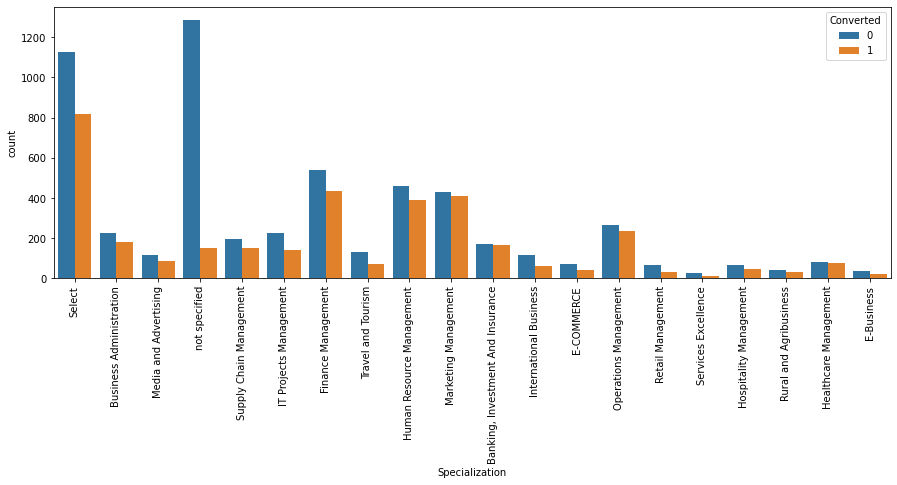

In [28]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [29]:
#Management Audience have given higher leads we can't drop

In [30]:
#What is your current occupation

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
not specified           2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

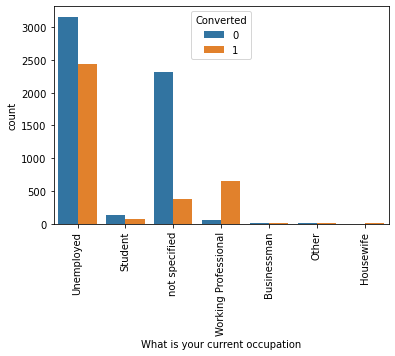

In [31]:
s1=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [32]:
#Working Professional going for courses are higher chances.

In [33]:
#checking value counts

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
not specified                2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

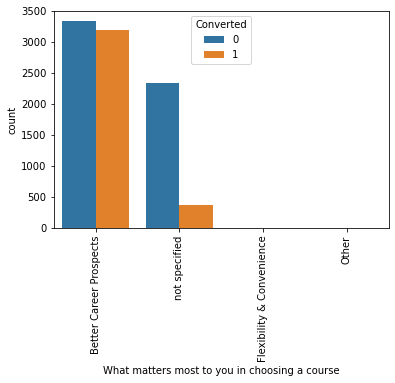

In [34]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads['What matters most to you in choosing a course'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [35]:
#Dropping the What matters most to you in choosing a course & adding to drop list
leads.drop(['What matters most to you in choosing a course'], inplace = True, axis = 1)

In [36]:
#checking percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [37]:
#checking value counts of Lead Source column

leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

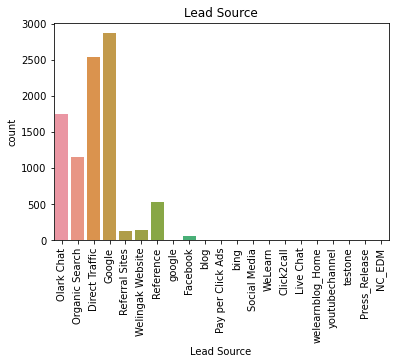

In [38]:
sns.countplot(leads['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

In [39]:
#Maximum number of leads are generated by Google and Direct traffic.
#Conversion Rate of reference leads and leads through welingak website is high.


In [40]:
# Last Activity:

leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

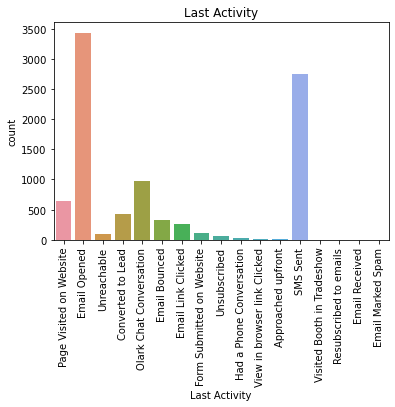

In [41]:
sns.countplot(leads['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

In [42]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

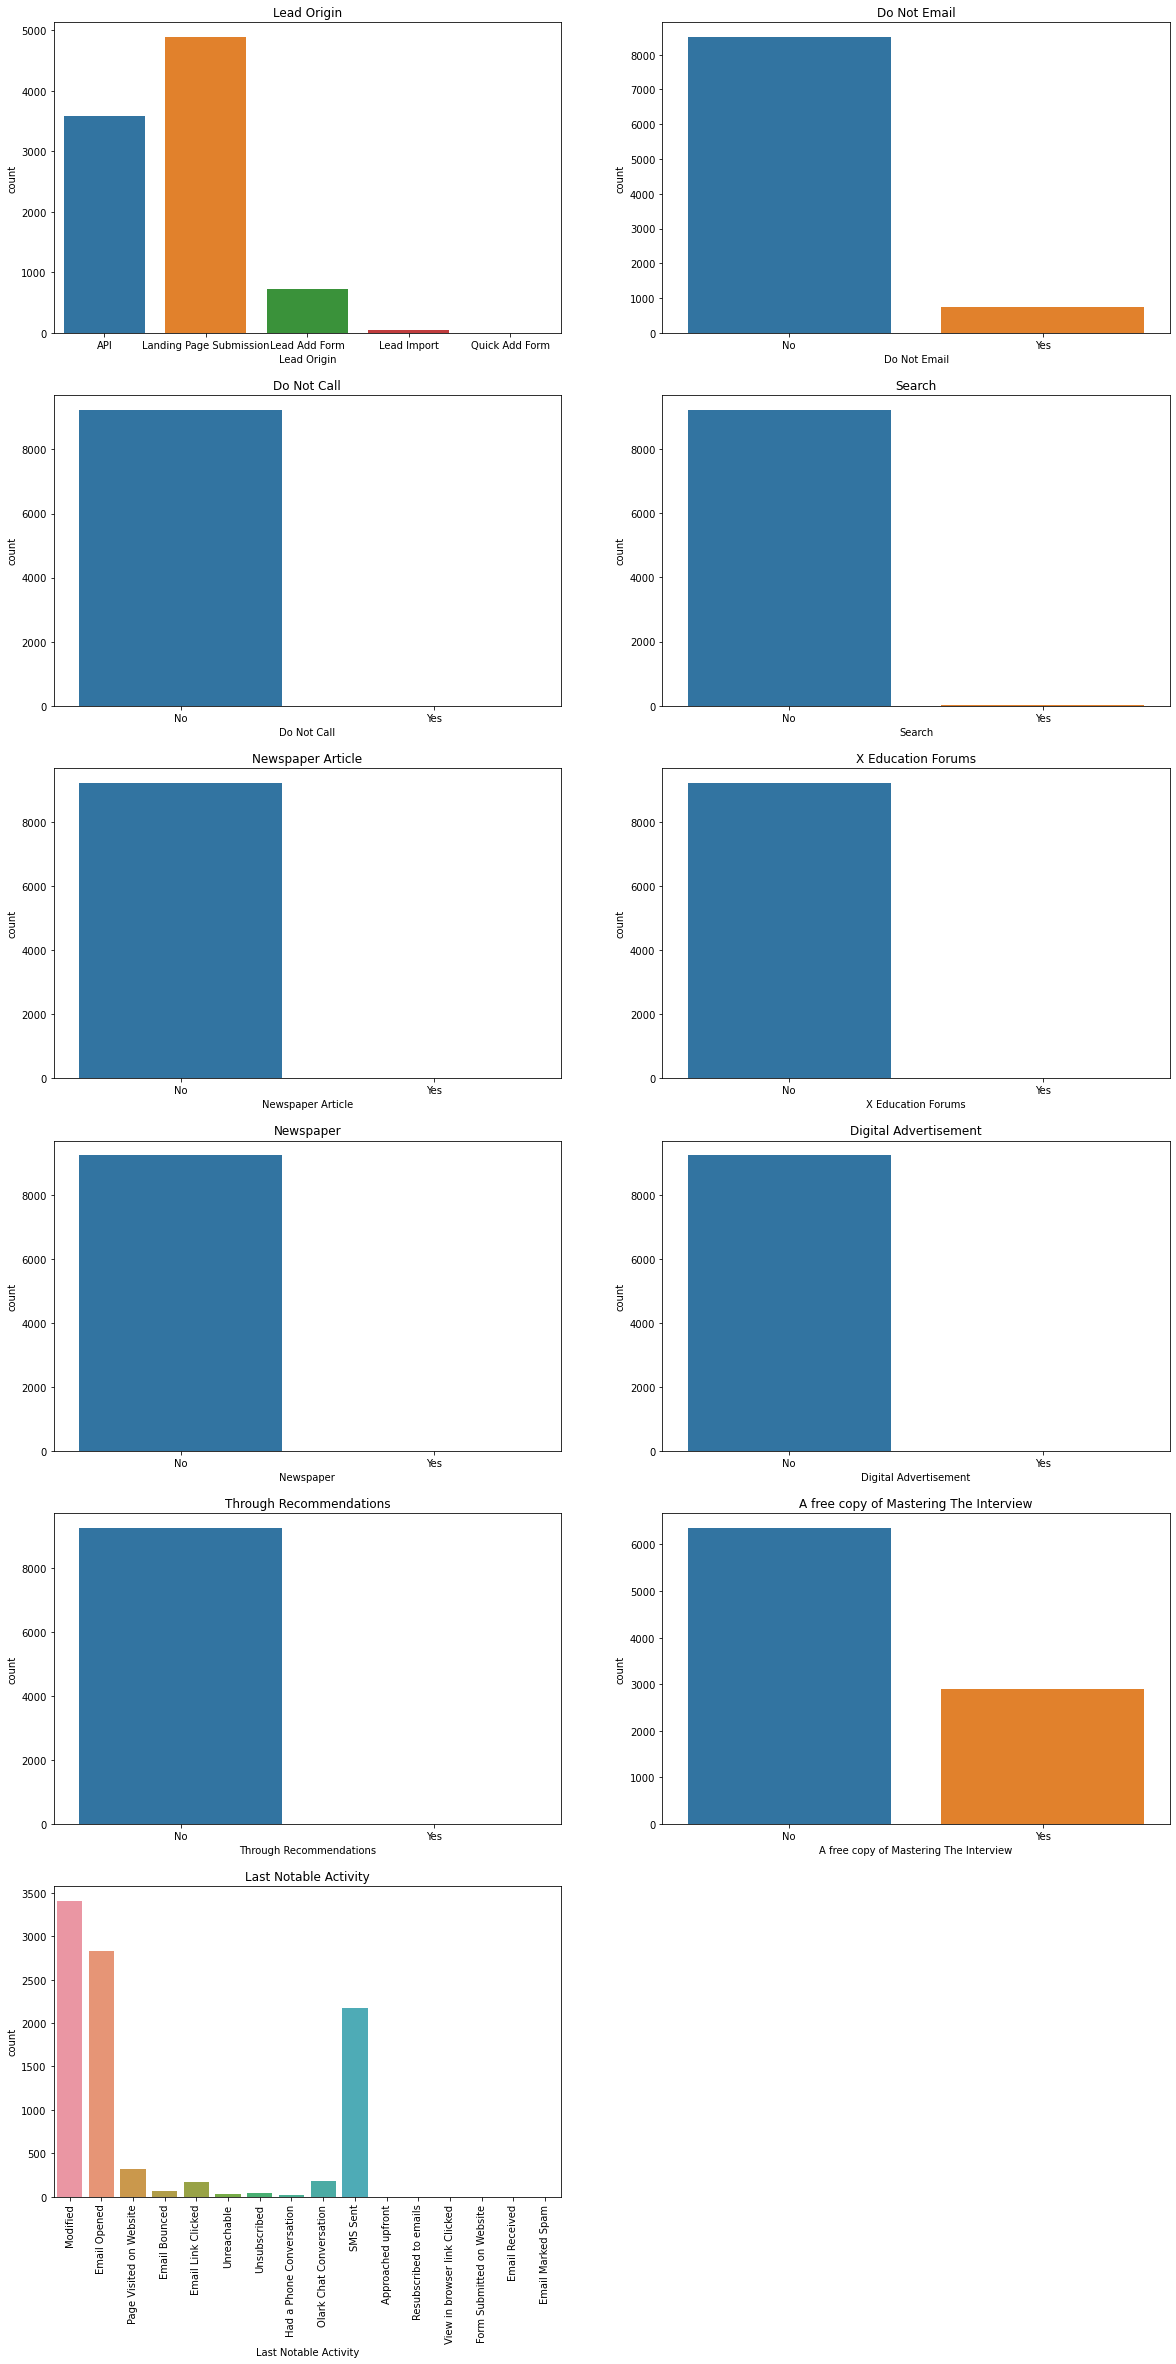

In [43]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(leads['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(leads['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(leads['Do Not Call'])
plt.title('Do Not Call')


plt.subplot(6,2,4)
sns.countplot(leads['Search'])
plt.title('Search')

plt.subplot(6,2,5)
sns.countplot(leads['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,6)
sns.countplot(leads['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,7)
sns.countplot(leads['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,8)
sns.countplot(leads['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,9)
sns.countplot(leads['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,10)
sns.countplot(leads['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,11)
sns.countplot(leads['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

### data preparation

In [44]:
# vars list for conversion
varlst = ['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']

# defining map function
def binary_map(x):
  return x.map({'Yes': 1, 'No': 0})

# applying the function
leads[varlst] = leads[varlst].apply(binary_map)

leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,0,0,0,0,0,No,Modified
1,API,Organic Search,No,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,0,0,0,0,0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,No,Modified
4,Landing Page Submission,Google,No,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,0,0,0,0,0,0,No,Modified


In [45]:
#Numerical Attributes Analysis:

In [46]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   int64  
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

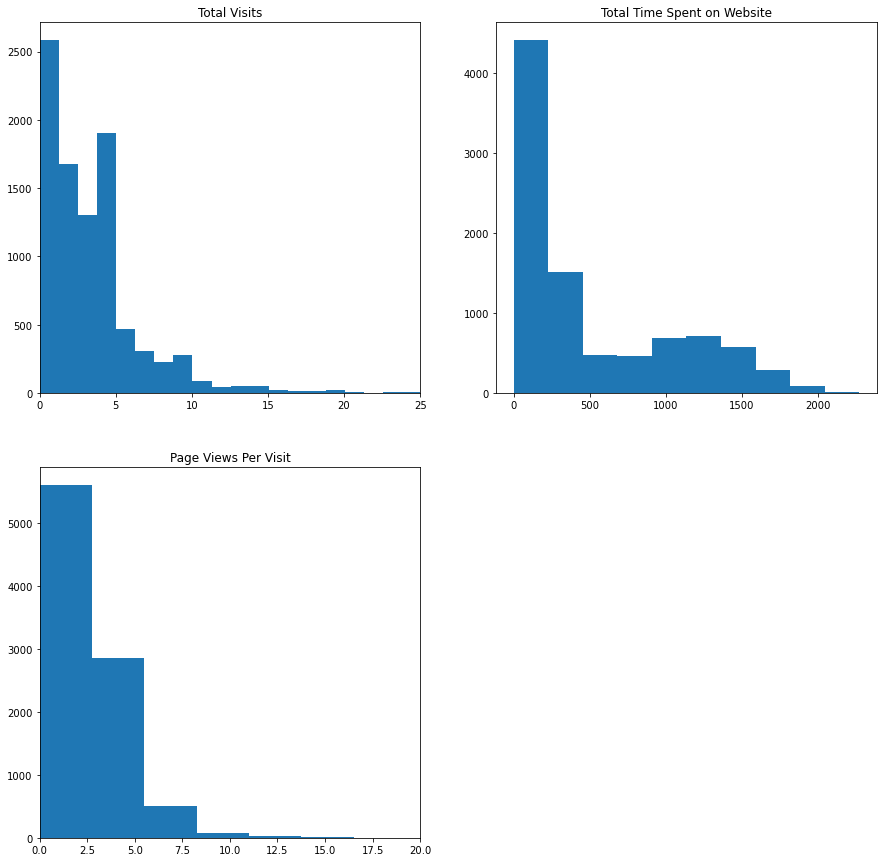

In [47]:
plt.figure(figsize = (15,15))
plt.subplot(221)
plt.hist(leads['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(leads['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(leads['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

In [48]:
#categorical variables to Converted

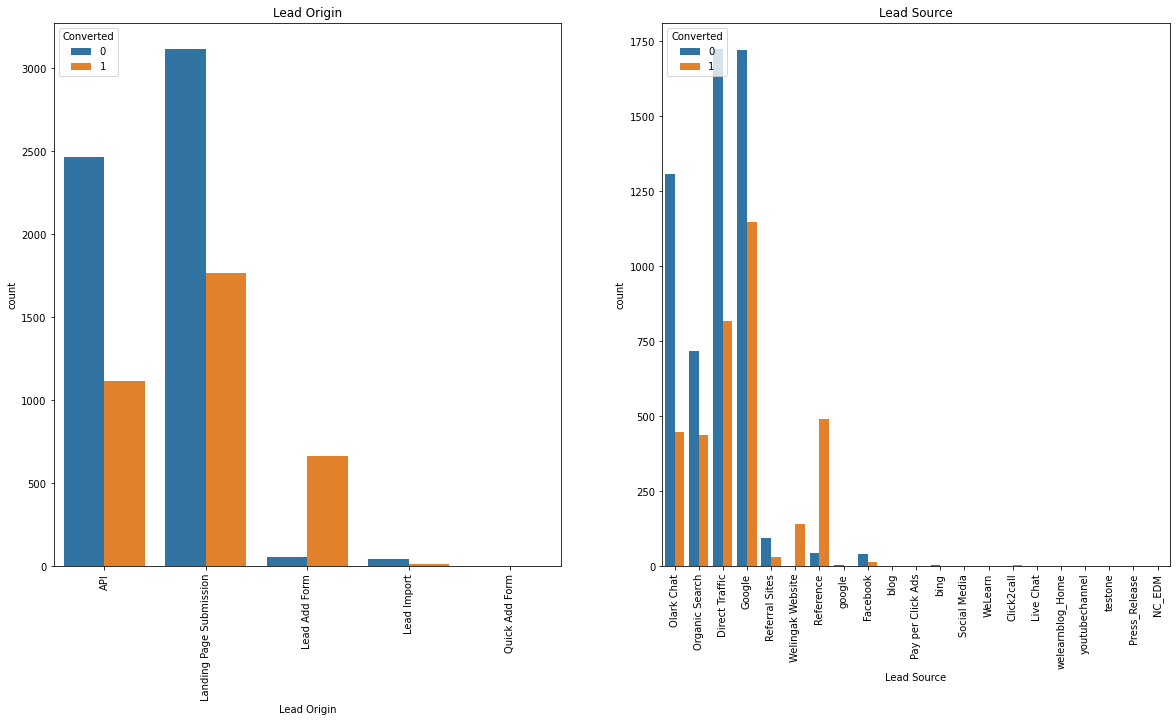

In [49]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

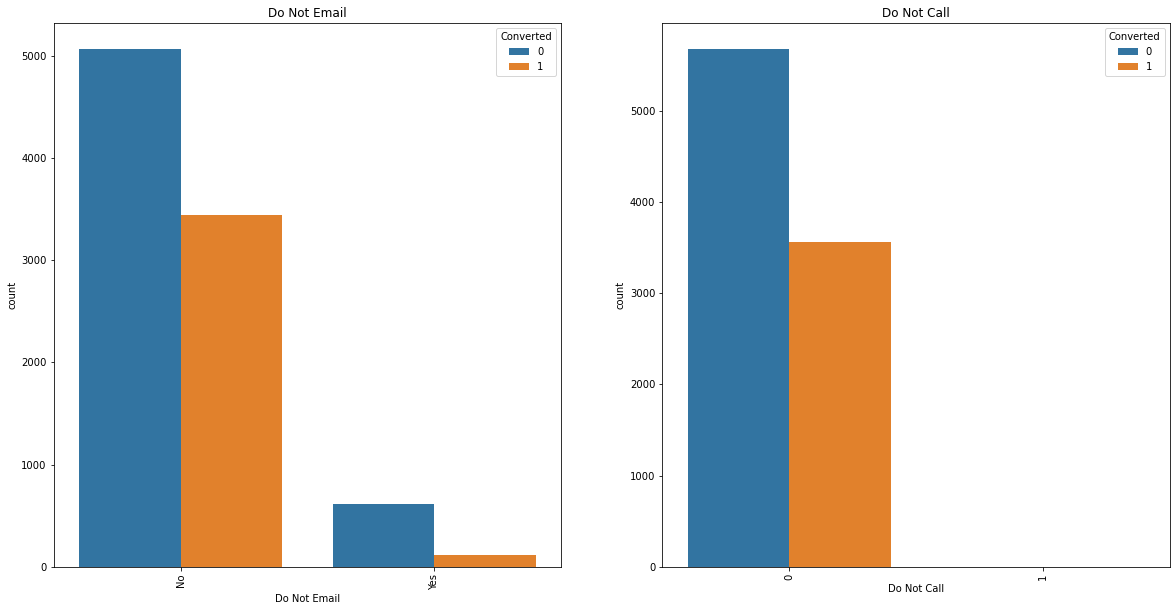

In [50]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

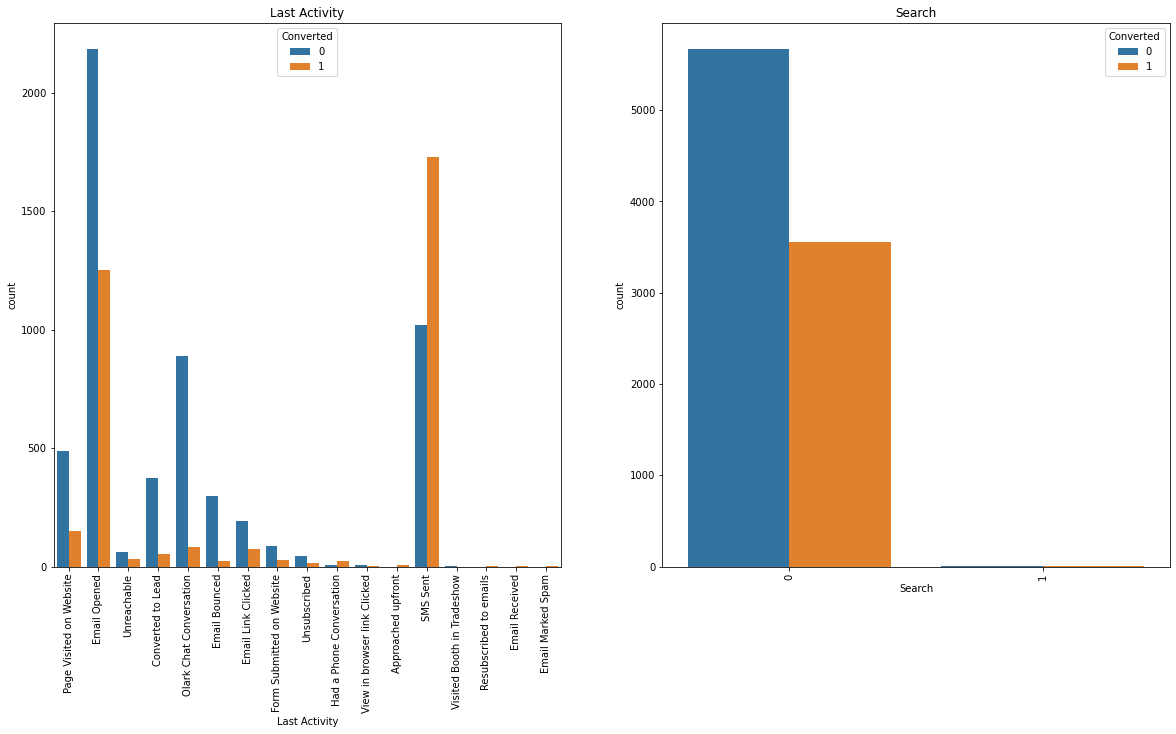

In [51]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')


plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

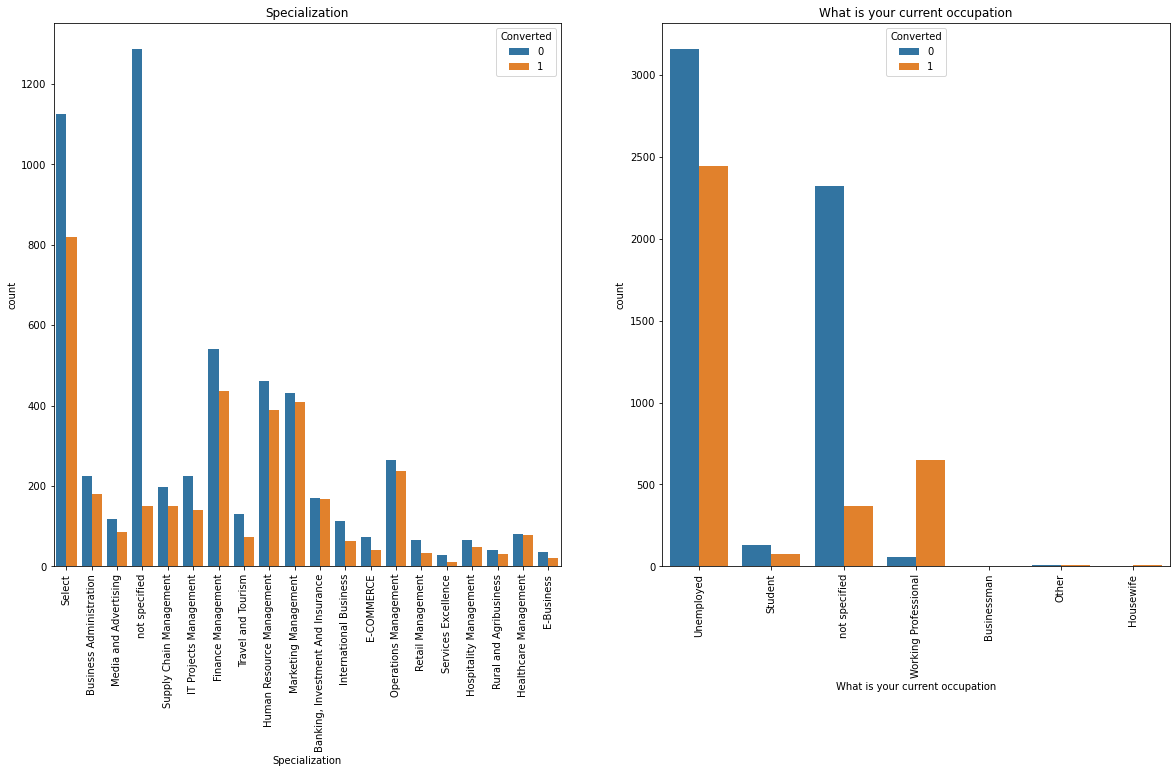

In [52]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

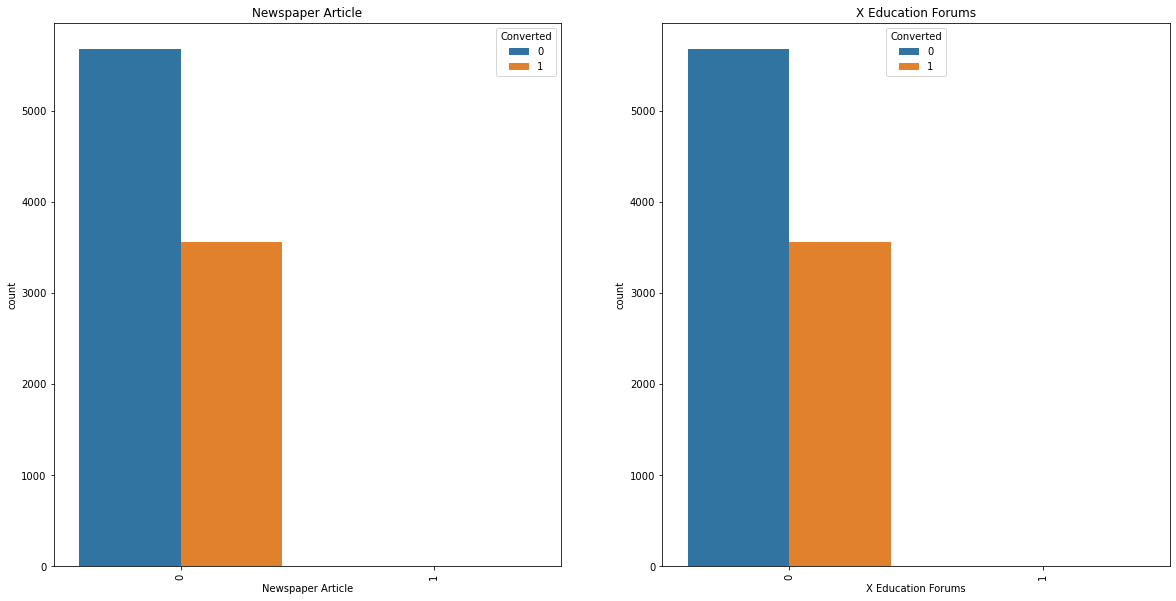

In [53]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

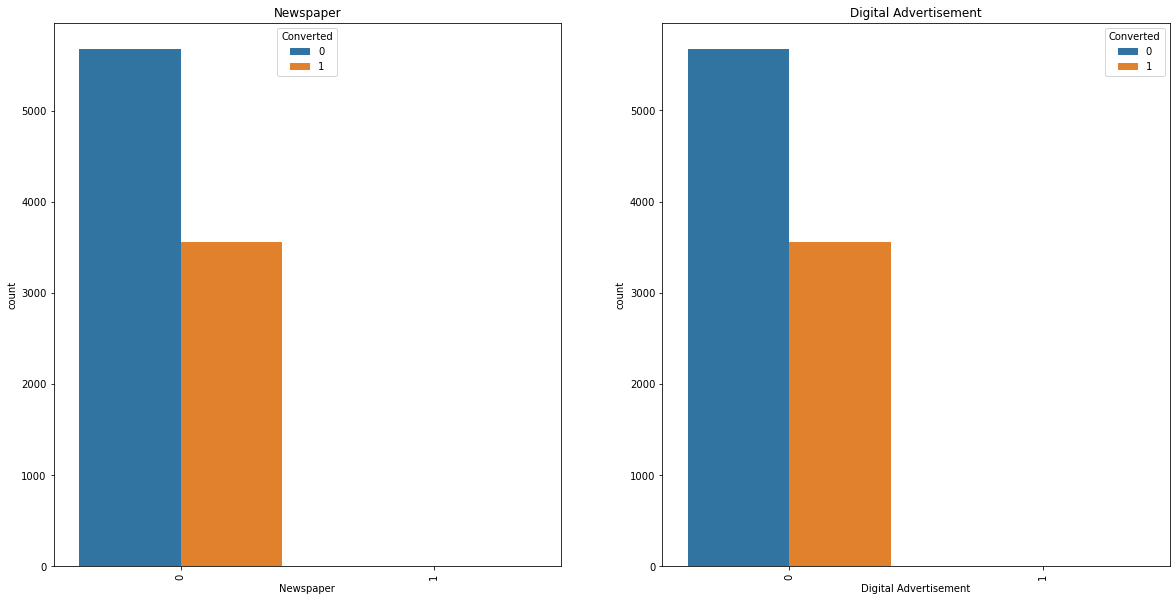

In [54]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

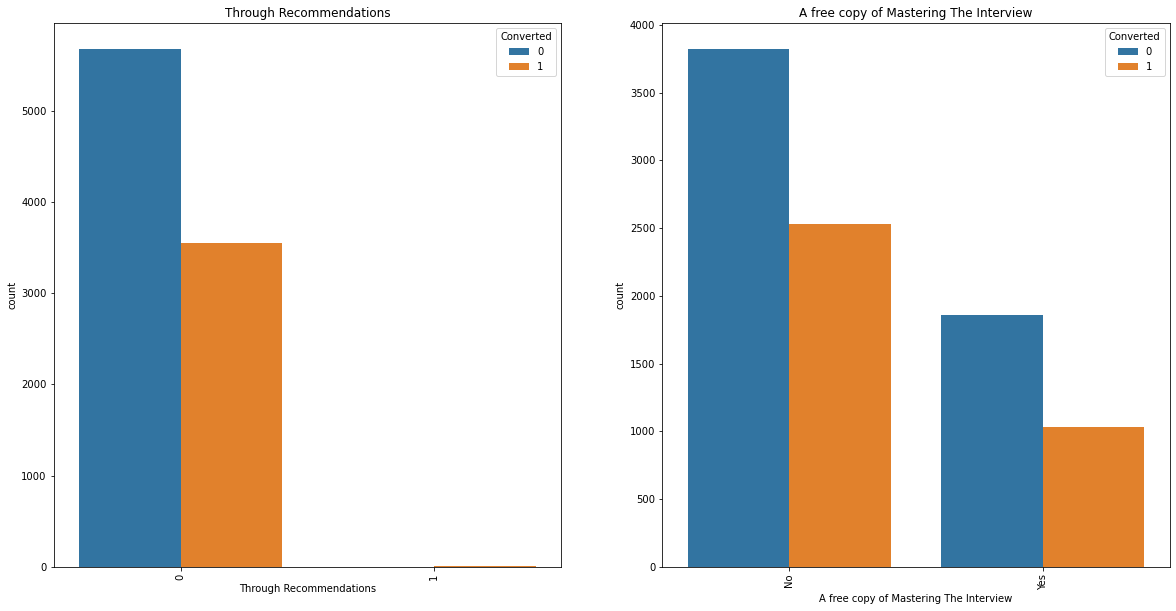

In [55]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

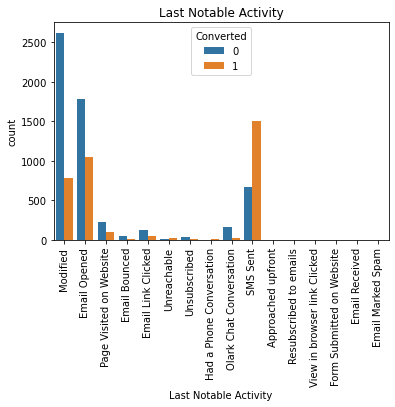

In [56]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

In [57]:
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending = True)

# droppping missing value rows

leads = leads[~(leads['Page Views Per Visit'].isna() == True)]

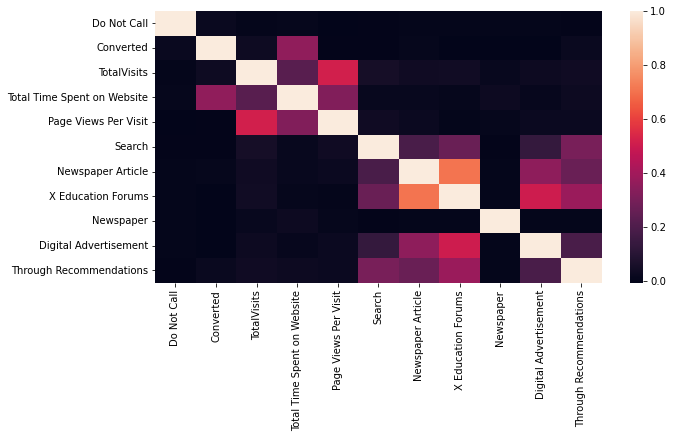

In [58]:
# To check the correlation among varibles

plt.figure(figsize=(10,5))
sns.heatmap(leads.corr())
plt.show()

In [59]:
#Checking the Outliner

In [60]:
numeric = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.445238,481.350104,2.362820
std,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,919.500000,3.000000
90%,7.000000,1372.000000,5.000000
99%,17.000000,1838.960000,9.000000
max,251.000000,2272.000000,55.000000


#### creating dummies

In [61]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Do Not Call                             9103 non-null   int64  
 4   Converted                               9103 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9103 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9103 non-null   object 
 9   Specialization                          9103 non-null   object 
 10  What is your current occupation         9103 non-null   obje

In [62]:
dummy= leads.select_dtypes(include=['object']).columns

In [63]:
dummy

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [64]:
dummy_leads = pd.get_dummies(leads[['Lead Origin','Specialization' ,'Lead Source', 
                                    'Do Not Email', 'Last Activity', 'What is your current occupation',
                                    'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

In [65]:
leads = pd.concat([leads,dummy_leads], axis=1)
leads

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0,0.0,0,0.00,Page Visited on Website,Select,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,0,0,5.0,674,2.50,Email Opened,Select,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,0,1,2.0,1532,2.00,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,0,1.0,305,1.00,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,0,1,2.0,1428,1.00,Converted to Lead,Select,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,0,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,0,0,2.0,238,2.00,SMS Sent,Media and Advertising,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,0,0,2.0,199,2.00,SMS Sent,Business Administration,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,0,1,3.0,499,3.00,SMS Sent,Human Resource Management,...,0,0,0,0,0,0,1,0,0,0


In [66]:
# dropping the Specialization_Select column

leads.drop(['Specialization_Select'], 1, inplace = True)

In [67]:
# Drop the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [68]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 91 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Call                                           9103 non-null   int64  
 1   Converted                                             9103 non-null   int64  
 2   TotalVisits                                           9103 non-null   float64
 3   Total Time Spent on Website                           9103 non-null   int64  
 4   Page Views Per Visit                                  9103 non-null   float64
 5   Search                                                9103 non-null   int64  
 6   Newspaper Article                                     9103 non-null   int64  
 7   X Education Forums                                    9103 non-null   int64  
 8   Newspaper                                             9103

### train and test split

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
# preapring data for X and y

# converted is our dependant variable. Dropping the var for getting X values
X = leads.drop(['Converted'], axis = 1)

# the target variable is converted. y is assigned with the var
y = leads['Converted']


In [71]:
# split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state= 100)

In [72]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6372, 90) (2731, 90) (6372,) (2731,)


### scaling the model

In [73]:
from sklearn.preprocessing import StandardScaler

here scaled value = X - μ/σ

μ - mean; σ - Std deviation



In [74]:
# Instantiate an object

scaler = StandardScaler()

# create a list of numeric vars
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Fit_transform on train data
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7962,0,-0.092900,1.476324,-0.394072,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5520,0,0.695064,-0.771066,2.111481,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,0,0.301082,-0.571257,0.061483,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1566,0,2.074000,1.393834,0.517039,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9170,0,-0.683873,-0.881052,-1.077404,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
### checking for Converted rate

Converted = (sum(leads['Converted'])/len(leads.Converted.index)) * 100
Converted

38.02043282434362

### model selection

##### using RFE method here

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
X_train.head()

,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7962,0,-0.092900,1.476324,-0.394072,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5520,0,0.695064,-0.771066,2.111481,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,0,0.301082,-0.571257,0.061483,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1566,0,2.074000,1.393834,0.517039,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9170,0,-0.683873,-0.881052,-1.077404,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### feature selection

In [78]:
# RFE with o/p 15 vars

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

rfe = RFE(logreg, n_features_to_select = 15) # selecting top 15 features
rfe = rfe.fit(X_train, y_train)

In [79]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Call', False, 21),
 ('TotalVisits', False, 59),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 61),
 ('Search', False, 74),
 ('Newspaper Article', False, 64),
 ('X Education Forums', False, 63),
 ('Newspaper', False, 5),
 ('Digital Advertisement', False, 30),
 ('Through Recommendations', False, 32),
 ('Lead Origin_Landing Page Submission', False, 31),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Specialization_Business Administration', False, 44),
 ('Specialization_E-Business', False, 6),
 ('Specialization_E-COMMERCE', False, 55),
 ('Specialization_Finance Management', False, 41),
 ('Specialization_Healthcare Management', False, 45),
 ('Specialization_Hospitality Management', False, 22),
 ('Specialization_Human Resource Management', False, 43),
 ('Specialization_IT Projects Management', False, 39),
 ('Specialization_International Business', False, 56),
 ('Specialization_Marketing Management', False, 33),
 ('

In [80]:
col = X_train.columns[rfe.support_] #rfe.support_ values are true to be taken for model building
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What is your current occupation_not specified',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [81]:
# columns which are excluded
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Speciali

#### modelling

In [82]:
import statsmodels.api as sm

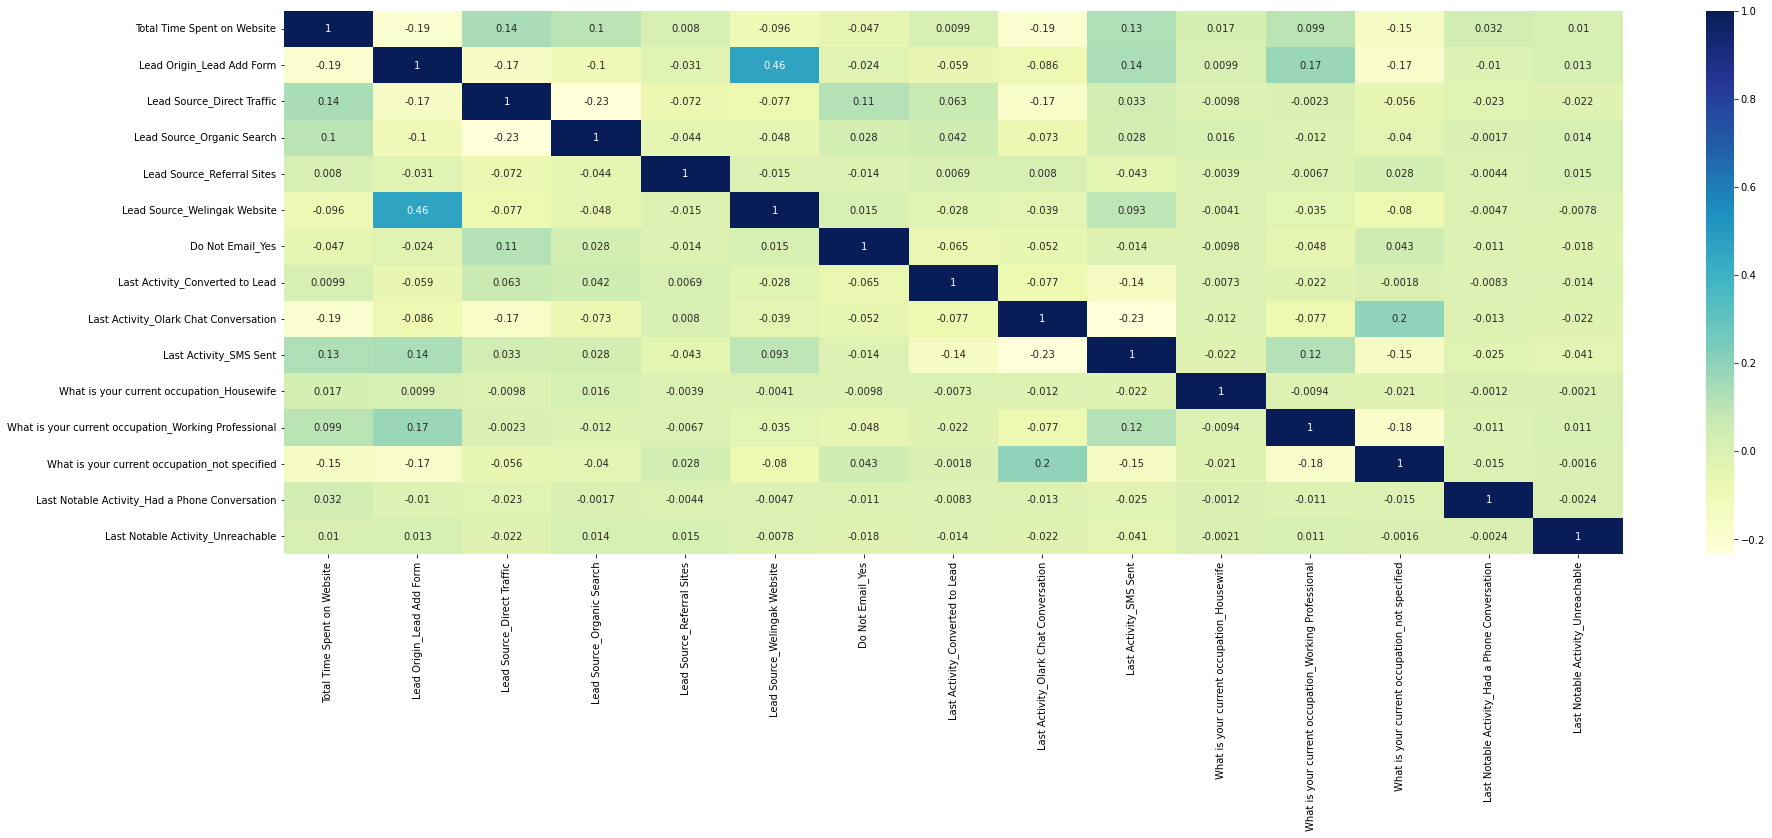

In [83]:
# plotting correlation matrix
plt.figure(figsize = (30,10))
sns.heatmap(X_train[col].corr(), annot = True, cmap= 'YlGnBu')
plt.show()

In [84]:
vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.51
9,Last Activity_SMS Sent,1.34
5,Lead Source_Welingak Website,1.32
12,What is your current occupation_not specified,1.30
2,Lead Source_Direct Traffic,1.29
8,Last Activity_Olark Chat Conversation,1.16
0,Total Time Spent on Website,1.15
11,What is your current occupation_Working Profes...,1.15
3,Lead Source_Organic Search,1.13
6,Do Not Email_Yes,1.11


##### model1

In [85]:
#add a const
X_train_sm = sm.add_constant(X_train[col])

# create 1st model
lm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

# fit
lm1 = lm.fit()

lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2644.0
Date:                Tue, 15 Nov 2022   Deviance:                       5287.9
Time:                        20:15:25   Pearson chi2:                 6.30e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6008      0.060     -9.987      0.000      -0.719      -0.483
Total Time Spent on Website                              0.9461      0.036     26.423      0.000       0.876       1.016
Lead Origin_Lead Add Form                                3.0536      0.221     13.819      0.000       2.621       3.487
Lead Source_Direct Traffic                              -0.6006      0.082     -7.347      0.000      -0.761      -0.440
Lead Source_Organic Search                              -0.4272      0.104     -4.108      0.000      -0.631      -0.223
Lead Source_Referral Sites                              -0.6636      0.334     -1.985      0.047      -1.319      -0.008
Lead Source_Welingak Website                             1.8078      0.751      2.407      0.016       0.336       3.280
Do Not Email_Yes                                        -1.4512      0.163     -8.883      0.000      -1.771      -1.131
Last Activity_Converted to Lead                         -1.3428      0.208     -6.468      0.000      -1.750      -0.936
Last Activity_Olark Chat Conversation                   -1.0280      0.162     -6.350      0.000      -1.345      -0.711
Last Activity_SMS Sent                                   1.2247      0.074     16.470      0.000       1.079       1.370
What is your current occupation_Housewife               22.8255   1.63e+04      0.001      0.999    -3.2e+04     3.2e+04
What is your current occupation_Working Professional     2.4837      0.185     13.458      0.000       2.122       2.845
What is your current occupation_not specified           -1.2043      0.087    -13.828      0.000      -1.375      -1.034
Last Notable Activity_Had a Phone Conversation           2.5848      1.150      2.248      0.025       0.332       4.838
Last Notable Activity_Unreachable                        1.8255      0.528      3.456      0.001       0.790       2.861
========================================================================================================================
"""

In [86]:
vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.51
9,Last Activity_SMS Sent,1.34
5,Lead Source_Welingak Website,1.32
12,What is your current occupation_not specified,1.30
2,Lead Source_Direct Traffic,1.29
8,Last Activity_Olark Chat Conversation,1.16
0,Total Time Spent on Website,1.15
11,What is your current occupation_Working Profes...,1.15
3,Lead Source_Organic Search,1.13
6,Do Not Email_Yes,1.11


In [87]:
#p-val > 0.05 can be dropped.

col = col.drop(['What is your current occupation_Housewife'])

In [88]:
#p-val > 0.05 can be dropped.

#col = col.drop(['Last Notable Activity_Had a Phone Conversation','Last Activity_Had a Phone Conversation'])

##### model2

In [89]:
#add a const
X_train_sm = sm.add_constant(X_train[col])

# create 1st model
lm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

# fit
lm2 = lm.fit()

lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2649.3
Date:                Tue, 15 Nov 2022   Deviance:                       5298.6
Time:                        20:15:32   Pearson chi2:                 6.31e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5936      0.060     -9.887      0.000      -0.711      -0.476
Total Time Spent on Website                              0.9466      0.036     26.456      0.000       0.876       1.017
Lead Origin_Lead Add Form                                3.0569      0.221     13.842      0.000       2.624       3.490
Lead Source_Direct Traffic                              -0.6009      0.082     -7.358      0.000      -0.761      -0.441
Lead Source_Organic Search                              -0.4200      0.104     -4.047      0.000      -0.623      -0.217
Lead Source_Referral Sites                              -0.6670      0.334     -1.995      0.046      -1.322      -0.012
Lead Source_Welingak Website                             1.8021      0.751      2.400      0.016       0.330       3.274
Do Not Email_Yes                                        -1.4553      0.163     -8.910      0.000      -1.775      -1.135
Last Activity_Converted to Lead                         -1.3501      0.208     -6.504      0.000      -1.757      -0.943
Last Activity_Olark Chat Conversation                   -1.0342      0.162     -6.388      0.000      -1.352      -0.717
Last Activity_SMS Sent                                   1.2179      0.074     16.390      0.000       1.072       1.364
What is your current occupation_Working Professional     2.4788      0.185     13.431      0.000       2.117       2.841
What is your current occupation_not specified           -1.2088      0.087    -13.886      0.000      -1.379      -1.038
Last Notable Activity_Had a Phone Conversation           2.5784      1.150      2.242      0.025       0.324       4.833
Last Notable Activity_Unreachable                        1.8190      0.528      3.443      0.001       0.784       2.854
========================================================================================================================
"""

In [90]:
vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.51
9,Last Activity_SMS Sent,1.34
5,Lead Source_Welingak Website,1.32
11,What is your current occupation_not specified,1.30
2,Lead Source_Direct Traffic,1.29
8,Last Activity_Olark Chat Conversation,1.16
0,Total Time Spent on Website,1.15
10,What is your current occupation_Working Profes...,1.15
3,Lead Source_Organic Search,1.13
6,Do Not Email_Yes,1.11


In [91]:
# since p -value < 0.05 and VIF also have low value, this can be considered as our final model

###### Residual Analysis

In [92]:
# getting the predicted values on train set

y_train_pred = lm2.predict(X_train_sm)
y_train_pred[:10]

# these are probabilities of getting 1 i.e., Converted

7962    0.883053
5520    0.127367
1962    0.520861
1566    0.961005
9170    0.193469
5097    0.066828
8954    0.465263
309     0.274626
5519    0.194882
1050    0.613480
dtype: float64

creating a flag between actual and predicted values

In [93]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_Prob': y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,ID
7962,0,0.883053,7962
5520,0,0.127367,5520
1962,0,0.520861,1962
1566,1,0.961005,1566
9170,0,0.193469,9170


creating new column 'predicted' with **1** if converted_prob > 0.5, else **0**

In [94]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [95]:
y_train_pred_final.head(10)

,Converted,Converted_Prob,ID,Predicted
7962,0,0.883053,7962,1
5520,0,0.127367,5520,0
1962,0,0.520861,1962,1
1566,1,0.961005,1566,1
9170,0,0.193469,9170,0
5097,0,0.066828,5097,0
8954,0,0.465263,8954,0
309,1,0.274626,309,0
5519,1,0.194882,5519,0
1050,1,0.613480,1050,1


###### confusion matrix

Accuracy = correctly predicted labels / total number of labels

In [96]:
from sklearn import metrics

In [97]:
conf = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
conf

array([[3513,  440],
       [ 794, 1625]], dtype=int64)

```
# output is in format
           not_Converted  Converted
not_Converted   [3513      440]
Converted       [ 794,     1625]
```

In [98]:
# overall accuracy 
metrics_val = metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)
metrics_val

0.8063402385436284

accuracy is about 80% # reasonable model

##### metrics beyond accuracy



```
# output as

               non converted   converted
non converted        TN          FP

converted            FN          TP
```



In [99]:
TP = conf[1,1] # true positive
TN = conf[0,0] # true negative
FP = conf[0,1] # false positive
FN = conf[1,0] # false negative

In [100]:
# sensitivity = TP / total no of positives (TP + FN)
sensitivity = 100* (TP / float(TP + FN))
print('sensitivity: ', sensitivity)

sensitivity:  67.17651922281934


sensitivity is to identify all 1's.
here it is 67% which is ok.

In [101]:
# specificity = TN / total no of negatives(TN + FP)
specificity = 100* (TN / float(FP + TN))
print('specificity: ', specificity)

specificity:  88.86921325575511


specificity is for negative values.
88% is good. 

In [102]:
# calculate false positive rate - FP/ total no of negatives(TN + FP)
FPR = 100* (FP / float(FP + TN))
print('false positive rate: ', FPR)

false positive rate:  11.130786744244878


FPR is identified falsely the converted rate.

In [103]:
# positive predictive value - TP / total positive (TP + FP)
PPV = 100* (TP / float(TP + FP))
print('positive predictive value: ', PPV)

positive predictive value:  78.69249394673123


PPR is how well we have predicted positive numbers

In [104]:
# negative predictive value - TN / total negative (TN + FN)
NPV = 100* (TN / float(TN + FN))
print('negative predictive value: ', NPV)

negative predictive value:  81.56489435802182


NPR is how well we have predicted negative numbers

As in this case, we are interested in identifying customers who would get converted.
Here, the values are quite good.

i.e., With the current cut off as 0.5 we have around 80% accuracy, sensitivity of around 67% and specificity of around 88%.

### plotting ROC curve

An ROC curve demonstrates:

* it shows trade off between sensitivity and specificity.

* the closer the curve follows the left hand border and then the top border of the ROC space, the more accurate the test

* the closer the comes to 45-degree diagonal, the less acurate the test

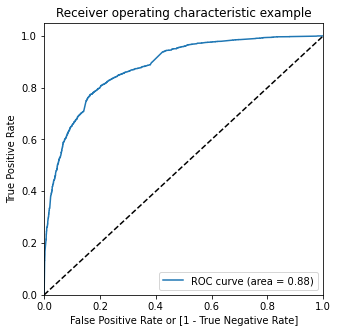

In [105]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### finding optimal cut off point

optimal cut off probability is where we get balanced sensitivity and specificity

In [106]:
# creating columns with different prob cut off

nums = [float (x)/10 for x in range(10)]
for i in nums:
  y_train_pred_final[i] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7962,0,0.883053,7962,1,1,1,1,1,1,1,1,1,1,0
5520,0,0.127367,5520,0,1,1,0,0,0,0,0,0,0,0
1962,0,0.520861,1962,1,1,1,1,1,1,1,0,0,0,0
1566,1,0.961005,1566,1,1,1,1,1,1,1,1,1,1,1
9170,0,0.193469,9170,0,1,1,0,0,0,0,0,0,0,0


In [107]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.626020  0.975610  0.412092
0.2   0.2  0.727872  0.885490  0.631419
0.3   0.3  0.786409  0.835056  0.756641
0.4   0.4  0.808067  0.780074  0.825196
0.5   0.5  0.806340  0.671765  0.888692
0.6   0.6  0.802731  0.602315  0.925373
0.7   0.7  0.783114  0.511782  0.949153
0.8   0.8  0.760515  0.417528  0.970402
0.9   0.9  0.713434  0.262092  0.989628


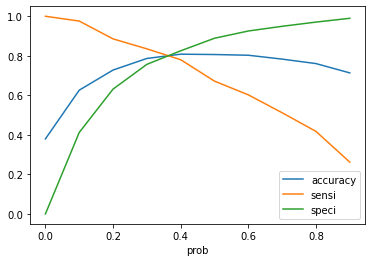

In [108]:
# plt accuracy , sensitivty , specificity

cutoff_df.plot.line(x='prob', y = ['accuracy','sensi','speci'])
plt.show()

#### Model Eval metrics - with new cut off

In [109]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.38 else 0
y_train_pred_final['Predicted_new'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_new
7962,0,0.883053,7962,1,1,1,1,1,1,1,1,1,1,0,1
5520,0,0.127367,5520,0,1,1,0,0,0,0,0,0,0,0,0
1962,0,0.520861,1962,1,1,1,1,1,1,1,0,0,0,0,1
1566,1,0.961005,1566,1,1,1,1,1,1,1,1,1,1,1,1
9170,0,0.193469,9170,0,1,1,0,0,0,0,0,0,0,0,0


##### confusion matrix for new cut off

Accuracy = correctly predicted labels / total number of labels

In [110]:
conf_new = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_new)
conf_new

array([[3223,  730],
       [ 511, 1908]], dtype=int64)

In [111]:
# overall accuracy 
metrics_val = metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted_new)
metrics_val

0.8052416823603264

accuracy is about 80 %

##### metrics beyond accuracy



```
# output as

               non Converted   Converted
non Converted        TN          FP

Converted            FN          TP
```



In [112]:
TP_new = conf_new[1,1] # true positive
TN_new = conf_new[0,0] # true negative
FP_new = conf_new[0,1] # false positive
FN_new = conf_new[1,0] # false negative

In [113]:
# sensitivity = TP / total no of positives (TP + FN)
sensitivity = 100* (TP_new / float(TP_new + FN_new))
print('sensitivity: ', sensitivity)

sensitivity:  78.87556841670111


In [114]:
# specificity = TN / total no of negatives(TN + FP)
specificity = 100* (TN_new / float(FP_new + TN_new))
print('specificity: ', specificity)

specificity:  81.53301290159372


In [115]:
# calculate false positive rate - FP/ total no of negatives(TN + FP)
FPR = 100* (FP_new / float(FP_new + TN_new))
print('false positive rate: ', FPR)

false positive rate:  18.466987098406275


In [116]:
# positive predictive value - TP / total positive (TP + FP)
PPV = 100* (TP_new / float(TP_new + FP_new))
print('positive predictive value: ', PPV)

positive predictive value:  72.32752084912812


PPR is how well we have predicted positive numbers

In [117]:
# negative predictive value - TN / total negative (TN + FN)
NPV = 100* (TN_new / float(TN_new + FN_new))
print('negative predictive value: ', NPV)

negative predictive value:  86.31494376004285


#### making predictions on test set - with cut off curve value

In [118]:
# create a list of numeric vars
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Fit_transform on test data
X_test[num_vars] = scaler.transform (X_test[num_vars])
X_test.head()

,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3504,0,-0.092900,-0.103815,0.289261,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4050,0,-0.683873,-0.881052,-1.077404,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7201,0,-0.289891,0.424120,-0.166294,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1196,0,0.104091,-0.105648,0.744816,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8219,0,0.695064,-0.428274,-0.280183,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [119]:
X_test = X_test[col]

In [120]:
#add a const
X_test_sm1 = sm.add_constant(X_test)


# getting the predicted values on test set
y_test_pred1 = lm2.predict(X_test_sm1)
y_test_pred1


3504    0.247507
4050    0.945173
7201    0.262984
1196    0.247184
8219    0.167986
          ...   
6508    0.335753
315     0.310133
3766    0.078874
8043    0.844028
5826    0.877642
Length: 2731, dtype: float64

In [121]:
# converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred1)
y_pred_1.head()

,0
3504,0.247507
4050,0.945173
7201,0.262984
1196,0.247184
8219,0.167986


In [122]:
y_test_df = pd.DataFrame(y_test)

In [123]:
# putting ID to index
y_test_df['ID'] = y_test_df.index

In [124]:
y_pred_1.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [125]:
y_pred_final1 = pd.concat([y_test_df, y_pred_1], axis = 1)

In [126]:
y_pred_final1 = y_pred_final1.rename(columns = {0: 'Converted_Prob'})

In [127]:
# rearranging the columns
y_pred_final1 = y_pred_final1.reindex(['ID', 'Converted', 'Converted_Prob'], axis = 1)
y_pred_final1

,ID,Converted,Converted_Prob
0,3504,0,0.247507
1,4050,1,0.945173
2,7201,0,0.262984
3,1196,0,0.247184
4,8219,1,0.167986
...,...,...,...
2726,6508,0,0.335753
2727,315,0,0.310133
2728,3766,0,0.078874
2729,8043,1,0.844028


In [128]:
# as the precision and trade off curve has given a cut off 0.38
y_pred_final1['final_predicted'] = y_pred_final1.Converted_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_pred_final1.head()

,ID,Converted,Converted_Prob,final_predicted
0,3504,0,0.247507,0
1,4050,1,0.945173,1
2,7201,0,0.262984,0
3,1196,0,0.247184,0
4,8219,1,0.167986,0


In [129]:
conf_test = metrics.confusion_matrix(y_pred_final1.Converted, y_pred_final1.final_predicted)
conf_test

array([[1384,  305],
       [ 211,  831]], dtype=int64)

In [130]:
# overall accuracy 
test_metrics_val = metrics.accuracy_score(y_pred_final1.Converted,y_pred_final1.final_predicted)
test_metrics_val

0.8110582204320762

In [131]:
TP_test = conf_test[1,1] # true positive
TN_test = conf_test[0,0] # true negative
FP_test = conf_test[0,1] # false positive
FN_test = conf_test[1,0] # false negative

In [132]:
# sensitivity = TP / total no of positives (TP + FN)
sensitivity_test = 100* (TP_test / float(TP_test + FN_test))
print('sensitivity_test: ', sensitivity_test)

sensitivity_test:  79.75047984644914


In [133]:
# specificity = TN / total no of negatives(TN + FP)
specificity_test = 100* (TN_test / float(FP_test + TN_test))
print('specificity_test: ', specificity_test)

specificity_test:  81.94197750148017


In [134]:
# calculate false positive rate - FP/ total no of negatives(TN + FP)
FPR_test= 100* (FP_test / float(FP_test + TN_test))
print('false positive rate_test: ', FPR_test)

false positive rate_test:  18.058022498519836


In [135]:
# positive predictive value - TP / total positive (TP + FP)
PPV_test = 100* (TP_test / float(TP_test + FP_test))
print('positive predictive value_test: ', PPV_test)

positive predictive value_test:  73.15140845070422


In [136]:
# negative predictive value - TN / total negative (TN + FN)
NPV_test = 100* (TN_test / float(TN_test + FN_test))
print('negative predictive value_test: ', NPV_test)

negative predictive value_test:  86.77115987460814


NPR is how well we have predicted negative numbers

As in this case, we are interested in identifying customers who might Converted.
These numbers are considerably good.

### precision and recall

In [137]:
# confusin metrics
conf

array([[3513,  440],
       [ 794, 1625]], dtype=int64)

In [138]:
# precision
# TP / TP + FP

precision = TP / (TP + FP)

print('precision: ',precision)

precision:  0.7869249394673123


In [139]:
# recall
# TP / TP + FN

recall = TP / (TP + FN)

print('recall: ', recall)

recall:  0.6717651922281934


both precision and recall gives a decent score

using sklearn utilities for the same

In [140]:
from sklearn.metrics import precision_score, recall_score

In [141]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7869249394673123

In [142]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.6717651922281934

Precision and Recall trade off

In [143]:
from sklearn.metrics import precision_recall_curve

In [144]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

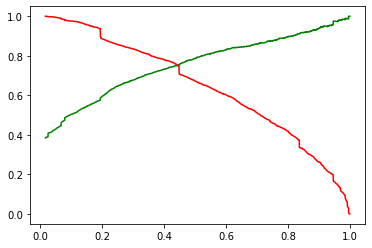

In [145]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

the curve is as expected. Hence evaluating the model with test set

#### making predictions on test set - with precision and recall curve

In [146]:
X_test_sm.columns

NameError: name 'X_test_sm' is not defined

In [147]:
#add a const
X_test_sm = sm.add_constant(X_test)


# getting the predicted values on test set
y_test_pred2 = lm2.predict(X_test_sm)
y_test_pred2


3504    0.247507
4050    0.945173
7201    0.262984
1196    0.247184
8219    0.167986
          ...   
6508    0.335753
315     0.310133
3766    0.078874
8043    0.844028
5826    0.877642
Length: 2731, dtype: float64

In [148]:
# converting y_pred to a dataframe which is an array
y_pred_2 = pd.DataFrame(y_test_pred2)
y_pred_2.head()

,0
3504,0.247507
4050,0.945173
7201,0.262984
1196,0.247184
8219,0.167986


In [149]:
y_test_df2 = pd.DataFrame(y_test)

In [150]:
# putting ID to index
y_test_df2['ID'] = y_test_df2.index

In [151]:
y_pred_2.reset_index(drop = True, inplace = True)
y_test_df2.reset_index(drop = True, inplace = True)

In [152]:
y_pred_final2 = pd.concat([y_test_df2, y_pred_2], axis = 1)

In [153]:
y_pred_final2 = y_pred_final2.rename(columns = {0: 'Converted_Prob'})

In [154]:
# rearranging the columns
y_pred_final2 = y_pred_final2.reindex(['ID', 'Converted', 'Converted_Prob'], axis = 1)
y_pred_final2

,ID,Converted,Converted_Prob
0,3504,0,0.247507
1,4050,1,0.945173
2,7201,0,0.262984
3,1196,0,0.247184
4,8219,1,0.167986
...,...,...,...
2726,6508,0,0.335753
2727,315,0,0.310133
2728,3766,0,0.078874
2729,8043,1,0.844028


In [155]:
# as the precision and trade off curve has given a cut off 0.41
y_pred_final2['final_predicted'] = y_pred_final2.Converted_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final2.head()

,ID,Converted,Converted_Prob,final_predicted
0,3504,0,0.247507,0
1,4050,1,0.945173,1
2,7201,0,0.262984,0
3,1196,0,0.247184,0
4,8219,1,0.167986,0


In [156]:
conf_test = metrics.confusion_matrix(y_pred_final2.Converted, y_pred_final2.final_predicted)
conf_test

array([[1406,  283],
       [ 233,  809]], dtype=int64)

In [157]:
# overall accuracy 
test_metrics_val = metrics.accuracy_score(y_pred_final2.Converted,y_pred_final2.final_predicted)
test_metrics_val

0.8110582204320762

In [158]:
TP_test = conf_test[1,1] # true positive
TN_test = conf_test[0,0] # true negative
FP_test = conf_test[0,1] # false positive
FN_test = conf_test[1,0] # false negative

In [159]:
# sensitivity = TP / total no of positives (TP + FN)
sensitivity_test = 100* (TP_test / float(TP_test + FN_test))
print('sensitivity_test: ', sensitivity_test)

sensitivity_test:  77.63915547024952


In [160]:
# specificity = TN / total no of negatives(TN + FP)
specificity_test = 100* (TN_test / float(FP_test + TN_test))
print('specificity_test: ', specificity_test)

specificity_test:  83.2445233866193


In [161]:
# calculate false positive rate - FP/ total no of negatives(TN + FP)
FPR_test= 100* (FP_test / float(FP_test + TN_test))
print('false positive rate_test: ', FPR_test)

false positive rate_test:  16.755476613380697


In [162]:
# positive predictive value - TP / total positive (TP + FP)
PPV_test = 100* (TP_test / float(TP_test + FP_test))
print('positive predictive value_test: ', PPV_test)

positive predictive value_test:  74.08424908424908


In [163]:
# negative predictive value - TN / total negative (TN + FN)
NPV_test = 100* (TN_test / float(TN_test + FN_test))
print('negative predictive value_test: ', NPV_test)

negative predictive value_test:  85.78401464307504


### Final Outcome on test results


```
Cut - off				           0.41        0.38

Accuracy				            81.1%       81.1%
Sensitivity				         77.6%       79.7%
Specificity				         83.2%       81.9%
False positive rate			     16.7%       18%
Positive predictive value		   74%         73.1%
Negative predictive value		   85.7%       86.7% 
```





In [164]:
# cut off predicted with both precision and recall curve and cut off point curve has given decent score.
# with this model, the more likely to be converted leads can be identified

These are the variables which can be considered by the company in finding leads which can be converted.



```
Total Time Spent on Website,
Lead Origin_Lead Add Form,
Lead Source_Direct Traffic,
Lead Source_Organic Search,
Lead Source_Referral Sites, 
Lead Source_Welingak Website,
Do Not Email_Yes, 
Last Activity_Converted to Lead,
Last Activity_Olark Chat Conversation,
Last Activity_SMS Sent,
What is your current occupation_Working Professional,
What is your current occupation_not specified,
Last Notable Activity_Had a Phone Conversation,
Last Notable Activity_Unreachable
```
